In [3]:
import mediapipe as mp
import cv2
import numpy as np
import uuid
import os
from tensorflow.keras.models import load_model
from pathlib import Path
from glob import glob
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
TRAIN_DIR = './archive/SigNN Character Database'
CUSTOM_TEST_DIR = './archive1/validation/asl-alphabet-test'

In [5]:
img_dirs = []
for entry in os.scandir(TRAIN_DIR):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [26]:
test_dirs = []
for entry in os.scandir(CUSTOM_TEST_DIR):
    if entry.is_dir():
        test_dirs.append(entry.path)

In [7]:
img_dirs

['./archive/SigNN Character Database\\A',
 './archive/SigNN Character Database\\B',
 './archive/SigNN Character Database\\C',
 './archive/SigNN Character Database\\D',
 './archive/SigNN Character Database\\E',
 './archive/SigNN Character Database\\F',
 './archive/SigNN Character Database\\G',
 './archive/SigNN Character Database\\H',
 './archive/SigNN Character Database\\I',
 './archive/SigNN Character Database\\J',
 './archive/SigNN Character Database\\K',
 './archive/SigNN Character Database\\L',
 './archive/SigNN Character Database\\M',
 './archive/SigNN Character Database\\N',
 './archive/SigNN Character Database\\O',
 './archive/SigNN Character Database\\P',
 './archive/SigNN Character Database\\Q',
 './archive/SigNN Character Database\\R',
 './archive/SigNN Character Database\\S',
 './archive/SigNN Character Database\\space',
 './archive/SigNN Character Database\\T',
 './archive/SigNN Character Database\\U',
 './archive/SigNN Character Database\\V',
 './archive/SigNN Character Da

In [8]:
frame = cv2.imread('./archive/SigNN Character Database/A/1.jpg')
frame.shape

(1920, 1920, 3)

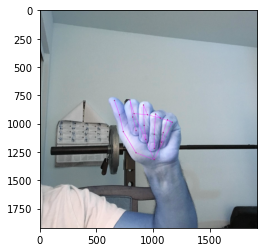

In [9]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
with mp_hands.Hands(min_detection_confidence=0.5,static_image_mode=True) as hands:
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image = cv2.flip(image, 1)
    image.flags.writeable = False
    results = hands.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    if results.multi_hand_landmarks:
        for num, hand in enumerate(results.multi_hand_landmarks):
#                 x_max = 0
#                 y_max = 0
#                 x_min = 200
#                 y_min = 200
#                 for lm in hand.landmark:
#                     x, y = int(lm.x * 200), int(lm.y * 200)
#                     if x > x_max:
#                         x_max = x
#                     if x < x_min:
#                         x_min = x
#                     if y > y_max:
#                         y_max = y
#                     if y < y_min:
#                         y_min = y
#                 cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
#                 img1 = image[x_min:x_max,y_min:y_max]
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS, 
                                        mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                        mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2),
                                        )
    plt.imshow(image)

In [18]:
def getXYlandmarksFromImages(directory):
    X, y = [], []
    i= 0
    mp_drawing = mp.solutions.drawing_utils
    mp_hands = mp.solutions.hands
    sign_leters_names = {}
    for img_dir in directory:
        letter = img_dir.split('\\')[-1]
        file_list = []
        for entry in os.scandir(img_dir):
            file_list.append(entry.path)
        sign_leters_names[letter] = file_list
    class_dict = {}
    count = 0
    for letters_names in sign_leters_names.keys():
        class_dict[letters_names] = count
        count = count + 1
    X, y = [], []
    for letter_name, training_files in sign_leters_names.items():
        for training_image in training_files:
            i = i + 1
            img = cv2.imread(training_image)
            scalled_raw_img = cv2.resize(img, (200,200))
            landmarksForImage = []
            with mp_hands.Hands(min_detection_confidence=0.6, static_image_mode=True, max_num_hands=1) as hands:
                image = cv2.cvtColor(scalled_raw_img, cv2.COLOR_BGR2RGB)
                image = cv2.flip(image, 1)
                image.flags.writeable = False
                results = hands.process(image)
                image.flags.writeable = True
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                if results.multi_hand_landmarks:
                    for num, hand in enumerate(results.multi_hand_landmarks):
                        landmarksForImage = [[lm.x,lm.y,lm.z] for lm in hand.landmark]
                    print(class_dict[letter_name], i)
                    X.append(landmarksForImage)
                    y.append(class_dict[letter_name])
                    
    return X, y

In [19]:
X, y = getXYlandmarksFromImages(img_dirs)

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 57
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184
0 185
0 186
0 187
0 188
0 189
0 190
0 191
0 192
0 193
0 194
0 195
0 196
0 197
0 198
0 199
0 200
0 201
0 202
0 204
0 205
0 206


2 1454
2 1455
2 1456
2 1457
2 1458
2 1459
2 1460
2 1463
2 1464
2 1465
2 1466
2 1467
3 1468
3 1469
3 1470
3 1471
3 1472
3 1473
3 1474
3 1475
3 1476
3 1477
3 1478
3 1479
3 1480
3 1481
3 1482
3 1483
3 1484
3 1485
3 1486
3 1487
3 1488
3 1490
3 1491
3 1492
3 1493
3 1494
3 1495
3 1496
3 1497
3 1501
3 1502
3 1503
3 1504
3 1505
3 1506
3 1507
3 1508
3 1509
3 1510
3 1511
3 1512
3 1513
3 1514
3 1515
3 1516
3 1517
3 1518
3 1519
3 1520
3 1521
3 1522
3 1523
3 1524
3 1525
3 1526
3 1527
3 1528
3 1529
3 1531
3 1534
3 1535
3 1536
3 1537
3 1538
3 1539
3 1540
3 1541
3 1542
3 1543
3 1545
3 1546
3 1547
3 1548
3 1549
3 1550
3 1551
3 1552
3 1553
3 1554
3 1555
3 1557
3 1564
3 1565
3 1566
3 1567
3 1568
3 1569
3 1570
3 1571
3 1572
3 1573
3 1574
3 1575
3 1576
3 1577
3 1578
3 1579
3 1580
3 1581
3 1582
3 1583
3 1584
3 1585
3 1586
3 1587
3 1588
3 1589
3 1590
3 1591
3 1592
3 1593
3 1594
3 1595
3 1596
3 1597
3 1598
3 1599
3 1600
3 1601
3 1602
3 1603
3 1604
3 1605
3 1606
3 1607
3 1608
3 1609
3 1610
3 1611
3 1612
3 1613

5 2702
5 2703
5 2704
5 2705
5 2706
5 2707
5 2708
5 2709
5 2710
5 2711
5 2712
5 2713
5 2714
5 2715
5 2716
5 2717
5 2718
5 2719
5 2720
5 2721
5 2722
5 2723
5 2724
5 2725
5 2726
5 2727
5 2728
5 2729
5 2730
5 2731
5 2732
5 2733
5 2734
5 2735
5 2736
5 2737
5 2738
5 2739
5 2740
5 2741
5 2742
5 2743
5 2744
5 2745
5 2746
5 2747
5 2748
5 2749
5 2750
5 2751
5 2752
5 2753
5 2754
5 2755
5 2756
5 2757
5 2758
5 2759
5 2760
5 2761
5 2762
5 2763
5 2764
6 2765
6 2766
6 2767
6 2768
6 2769
6 2770
6 2771
6 2772
6 2773
6 2774
6 2775
6 2776
6 2777
6 2778
6 2779
6 2780
6 2781
6 2782
6 2783
6 2784
6 2785
6 2786
6 2787
6 2788
6 2789
6 2790
6 2791
6 2792
6 2793
6 2794
6 2795
6 2796
6 2797
6 2798
6 2799
6 2800
6 2801
6 2802
6 2803
6 2804
6 2805
6 2806
6 2807
6 2808
6 2809
6 2810
6 2811
6 2812
6 2813
6 2814
6 2815
6 2816
6 2817
6 2818
6 2819
6 2820
6 2821
6 2822
6 2823
6 2824
6 2825
6 2826
6 2827
6 2828
6 2829
6 2830
6 2831
6 2832
6 2833
6 2834
6 2835
6 2836
6 2837
6 2838
6 2839
6 2840
6 2841
6 2842
6 2843
6 2844

9 3923
9 3924
9 3931
9 3932
9 3935
9 3937
9 3946
9 3947
9 3948
9 3953
9 3954
9 3955
9 3956
9 3957
9 3958
9 3960
9 3961
9 3962
9 3963
9 3966
9 3969
9 3971
9 3972
9 3976
9 3980
9 3981
9 3983
9 3986
9 3987
9 3988
9 3991
9 3995
9 3996
9 3998
9 4000
9 4001
9 4002
9 4003
9 4004
9 4005
9 4006
9 4011
9 4012
9 4013
9 4015
9 4016
9 4017
9 4018
9 4024
9 4035
9 4042
9 4044
9 4045
9 4046
9 4047
9 4048
9 4049
9 4050
9 4051
9 4054
9 4055
9 4057
9 4058
9 4059
9 4060
9 4063
9 4064
9 4069
9 4071
9 4072
9 4074
9 4075
9 4076
9 4077
9 4078
9 4079
9 4080
9 4086
9 4087
9 4088
9 4089
9 4091
9 4092
9 4093
9 4094
9 4097
9 4100
9 4102
9 4103
9 4105
9 4107
9 4108
9 4110
9 4112
9 4113
9 4114
9 4124
9 4130
9 4131
9 4132
9 4133
9 4135
9 4136
9 4138
9 4139
9 4140
9 4141
9 4142
9 4143
9 4144
9 4145
9 4146
9 4148
9 4150
9 4151
9 4156
9 4157
9 4163
9 4165
9 4167
9 4168
9 4169
9 4170
9 4171
9 4172
9 4173
9 4174
9 4175
9 4176
9 4177
9 4178
9 4179
9 4180
9 4181
9 4182
9 4183
9 4184
9 4186
9 4188
9 4190
9 4191
9 4192
9 4193

9 5882
9 5885
9 5889
9 5890
9 5891
9 5892
9 5901
9 5910
9 5911
9 5912
9 5913
9 5916
9 5917
9 5923
9 5927
9 5928
9 5929
9 5930
9 5931
9 5932
9 5933
9 5934
9 5935
9 5936
9 5937
9 5938
9 5939
9 5940
9 5941
9 5942
9 5943
9 5944
9 5945
9 5946
9 5947
9 5948
9 5949
9 5950
9 5951
9 5952
9 5953
9 5954
9 5955
9 5956
9 5957
9 5958
9 5959
9 5960
9 5961
9 5962
9 5963
9 5964
9 5965
9 5966
9 5967
9 5968
9 5969
9 5970
9 5971
9 5972
9 5973
9 5974
9 5975
9 5976
9 5977
9 5978
9 5979
9 5980
9 5981
9 5982
9 5983
9 5984
9 5985
9 5986
9 5987
9 5988
9 5989
9 5990
9 5991
9 5993
9 5994
9 5996
9 5998
9 5999
9 6000
9 6001
9 6002
9 6003
9 6004
9 6005
9 6006
9 6007
9 6008
9 6009
9 6010
9 6011
9 6012
9 6013
9 6014
9 6015
9 6016
9 6020
9 6021
9 6022
9 6023
9 6025
9 6027
9 6028
9 6029
9 6030
9 6031
9 6032
9 6033
9 6034
9 6035
9 6036
9 6037
9 6038
9 6039
9 6040
9 6041
9 6042
9 6043
9 6044
9 6045
9 6046
9 6047
9 6048
9 6049
9 6050
9 6051
9 6052
9 6053
9 6054
9 6055
9 6056
9 6057
9 6058
9 6059
9 6060
9 6061
9 6062
9 6063

10 7071
10 7072
10 7073
10 7075
10 7076
10 7078
10 7079
10 7080
10 7081
10 7082
10 7083
10 7084
10 7085
10 7086
10 7087
10 7088
10 7089
10 7090
10 7091
10 7092
10 7093
10 7094
10 7095
10 7096
10 7097
10 7098
10 7099
10 7100
10 7101
10 7102
10 7103
10 7104
10 7105
10 7106
10 7107
10 7108
10 7109
10 7110
10 7111
10 7112
10 7113
10 7114
10 7115
10 7116
10 7117
10 7118
10 7119
10 7120
10 7121
10 7122
10 7123
10 7124
10 7125
10 7126
10 7127
10 7128
10 7129
10 7130
10 7131
10 7132
10 7133
10 7134
10 7135
10 7136
10 7137
10 7138
10 7139
10 7140
10 7141
10 7142
10 7143
10 7144
10 7145
10 7146
10 7147
10 7148
10 7149
10 7150
10 7151
10 7152
11 7153
11 7154
11 7155
11 7156
11 7157
11 7158
11 7159
11 7160
11 7161
11 7162
11 7163
11 7164
11 7165
11 7166
11 7167
11 7168
11 7169
11 7170
11 7171
11 7172
11 7173
11 7174
11 7175
11 7176
11 7177
11 7178
11 7179
11 7180
11 7181
11 7182
11 7183
11 7184
11 7185
11 7186
11 7187
11 7188
11 7189
11 7190
11 7191
11 7192
11 7193
11 7194
11 7195
11 7196
11 7197


14 8201
14 8202
14 8203
14 8204
14 8205
14 8206
14 8207
14 8208
14 8209
14 8210
14 8211
14 8212
14 8213
14 8214
14 8215
14 8216
14 8217
14 8218
14 8219
14 8220
14 8221
14 8222
14 8223
14 8224
14 8225
14 8226
14 8227
14 8228
14 8229
14 8230
14 8231
14 8232
14 8233
14 8234
14 8235
14 8236
14 8237
14 8238
14 8239
14 8240
14 8241
14 8242
14 8243
14 8244
14 8245
14 8246
14 8247
14 8248
14 8249
14 8250
14 8251
14 8252
14 8253
14 8254
14 8255
14 8256
14 8257
14 8258
14 8259
14 8260
14 8261
14 8262
14 8263
14 8264
14 8265
14 8266
14 8267
14 8268
14 8269
14 8270
14 8271
14 8272
14 8273
14 8274
14 8276
14 8277
14 8278
14 8279
14 8281
14 8282
14 8283
14 8284
14 8285
14 8286
14 8287
14 8288
14 8289
14 8290
14 8291
14 8292
14 8293
14 8294
14 8295
14 8296
14 8297
14 8298
14 8299
14 8300
14 8301
14 8302
14 8303
14 8304
14 8305
14 8306
14 8307
14 8308
14 8309
14 8310
14 8311
14 8312
14 8313
14 8314
14 8315
14 8318
14 8319
14 8321
14 8322
14 8324
14 8325
14 8326
14 8327
14 8328
14 8330
14 8331
14 8332


18 9422
18 9423
18 9424
18 9425
18 9426
18 9427
18 9428
18 9429
18 9430
18 9431
18 9433
18 9434
18 9435
18 9436
18 9437
18 9438
18 9439
18 9440
18 9441
18 9442
18 9443
18 9444
18 9445
18 9446
18 9447
18 9448
18 9449
18 9450
18 9451
18 9452
18 9453
18 9455
18 9456
18 9457
18 9458
18 9459
18 9460
18 9461
18 9462
18 9463
18 9464
18 9465
18 9466
18 9467
18 9468
18 9469
18 9470
18 9471
18 9472
18 9473
18 9474
18 9475
18 9476
18 9477
18 9478
18 9479
18 9480
18 9481
18 9482
18 9483
18 9484
18 9485
18 9486
18 9487
18 9488
18 9489
18 9490
18 9491
18 9492
18 9493
18 9494
18 9495
18 9496
18 9497
18 9498
18 9499
18 9500
18 9501
18 9502
18 9503
18 9504
18 9505
18 9506
18 9507
18 9508
18 9510
18 9511
18 9512
18 9513
18 9514
18 9515
18 9516
18 9517
18 9518
18 9519
18 9520
18 9521
18 9522
18 9523
18 9524
18 9525
18 9526
18 9527
18 9528
18 9529
18 9530
18 9531
18 9532
18 9533
18 9534
18 9535
18 9536
18 9537
18 9538
18 9539
18 9540
18 9541
18 9542
18 9543
19 9544
19 9545
19 9546
19 9547
19 9557
19 9565


19 12249
19 12252
19 12253
19 12255
19 12256
19 12257
19 12258
19 12260
19 12267
19 12278
19 12281
19 12282
19 12283
19 12284
19 12285
19 12286
19 12287
19 12288
19 12289
19 12290
19 12291
19 12292
19 12293
19 12294
19 12295
19 12296
19 12297
19 12299
19 12300
19 12301
19 12303
19 12306
19 12307
19 12308
19 12309
19 12310
19 12311
19 12312
19 12313
19 12314
19 12315
19 12316
19 12317
19 12318
19 12319
19 12320
19 12321
19 12323
19 12324
19 12325
19 12326
19 12327
19 12328
19 12329
19 12330
19 12331
19 12332
19 12333
19 12334
19 12335
19 12336
19 12337
19 12342
19 12343
19 12344
19 12345
19 12346
19 12347
19 12348
19 12349
19 12350
19 12351
19 12352
19 12353
19 12354
19 12355
19 12356
19 12357
19 12358
19 12359
19 12360
19 12361
19 12362
19 12363
19 12364
19 12365
19 12366
19 12367
19 12368
19 12369
19 12370
19 12371
19 12372
19 12373
19 12374
19 12375
19 12376
19 12377
19 12378
19 12379
19 12381
19 12382
19 12383
19 12384
19 12385
19 12387
19 12388
19 12389
19 12390
19 12391
19 12392
1

22 13236
22 13237
22 13238
22 13239
22 13240
22 13241
22 13242
22 13243
22 13244
22 13245
22 13246
22 13247
22 13248
22 13249
22 13250
22 13251
22 13252
22 13253
22 13254
22 13255
22 13256
22 13257
22 13258
22 13259
22 13260
22 13261
22 13262
22 13263
22 13264
22 13265
22 13266
22 13267
22 13269
22 13270
22 13271
22 13272
22 13273
22 13274
22 13275
22 13276
22 13277
22 13278
22 13279
22 13282
22 13284
22 13285
22 13286
22 13287
22 13288
22 13289
22 13290
22 13291
22 13292
22 13295
22 13296
22 13297
22 13298
22 13299
22 13300
22 13301
22 13303
22 13309
22 13312
22 13313
22 13315
22 13316
22 13317
22 13319
22 13320
22 13321
22 13322
22 13323
22 13325
22 13327
22 13328
22 13329
22 13330
22 13331
22 13332
22 13333
22 13334
22 13335
22 13336
22 13337
22 13338
22 13339
22 13340
22 13341
22 13342
22 13343
22 13344
22 13345
22 13347
22 13348
22 13349
22 13350
22 13351
22 13352
22 13353
22 13354
22 13355
22 13356
22 13357
22 13358
22 13365
22 13367
22 13368
22 13369
22 13370
22 13372
22 13373
2

25 14339
25 14340
25 14341
25 14342
25 14343
25 14344
25 14345
25 14346
25 14347
25 14348
25 14349
25 14350
25 14351
25 14352
25 14353
25 14354
25 14355
25 14356
25 14357
25 14358
25 14359
25 14360
25 14362
25 14363
25 14364
25 14365
25 14366
25 14367
25 14368
25 14369
25 14370
25 14371
25 14372
25 14373
25 14374
25 14375
25 14376
25 14377
25 14378
25 14379
25 14380
25 14381
25 14382
25 14383
25 14384
25 14385
25 14386
25 14387
25 14388
25 14389
25 14390
25 14391
25 14392
25 14393
25 14394
25 14395
25 14396
25 14397
25 14398
25 14399
25 14400
25 14401
25 14402
25 14403
25 14404
25 14405
25 14406
25 14407
25 14408
25 14409
25 14410
25 14411
25 14412
25 14413
25 14414
25 14415
25 14416
25 14417
25 14418
25 14419
25 14420
25 14421
25 14422
25 14423
25 14424
25 14425
25 14426
25 14427
25 14428
25 14429
25 14430
25 14431
25 14432
25 14433
25 14434
25 14435
25 14436
25 14437
25 14438
25 14439
25 14440
25 14441
25 14442
26 14443
26 14444
26 14445
26 14446
26 14447
26 14448
26 14449
26 14450
2

26 15364
26 15365
26 15366
26 15367
26 15368
26 15369
26 15370
26 15371
26 15372
26 15373
26 15374
26 15375
26 15376
26 15377
26 15378
26 15379
26 15380
26 15381
26 15382
26 15383
26 15384
26 15385
26 15386
26 15387
26 15388
26 15389
26 15390
26 15391
26 15392
26 15393
26 15394
26 15395
26 15396
26 15397
26 15398
26 15399
26 15400
26 15401
26 15402
26 15403
26 15404
26 15405
26 15406
26 15407
26 15408
26 15409
26 15410
26 15411
26 15412
26 15413
26 15414
26 15415
26 15416
26 15417
26 15418
26 15421
26 15422
26 15423
26 15424
26 15425
26 15426
26 15427
26 15428
26 15429
26 15430
26 15431
26 15432
26 15433
26 15434
26 15435
26 15436
26 15437
26 15438
26 15439
26 15440
26 15441
26 15442
26 15443
26 15444
26 15445
26 15446
26 15447
26 15448
26 15449
26 15450
26 15451
26 15452
26 15453
26 15454
26 15455
26 15456
26 15457
26 15458
26 15459
26 15460
26 15461
26 15462
26 15463
26 15464
26 15465
26 15466
26 15467
26 15468
26 15469
26 15470
26 15471
26 15472
26 15473
26 15474
26 15475
26 15476
2

26 16930
26 16931
26 16932
26 16933
26 16934
26 16935
26 16936
26 16937
26 16938
26 16939
26 16940
26 16941
26 16942
26 16943
26 16944
26 16945
26 16946
26 16947
26 16948
26 16949
26 16950
26 16951
26 16952
26 16953
26 16954
26 16955
26 16956
26 16957
26 16958
26 16959
26 16960
26 16961
26 16962
26 16963
26 16964
26 16965
26 16966
26 16967
26 16968
26 16969
26 16970
26 16971
26 16972
26 16973
26 16974
26 16975
26 16976
26 16977
26 16978
26 16979
26 16980
26 16981
26 16982
26 16983
26 16984
26 16985
26 16986
26 16987
26 16988
26 16989
26 16990
26 16991
26 16992
26 16993
26 16994
26 16995
26 16996
26 16997
26 16998
26 16999
26 17000
26 17001
26 17002
26 17003
26 17004
26 17005
26 17006
26 17007
26 17008
26 17009
26 17010
26 17011
26 17012
26 17013
26 17014
26 17015
26 17016
26 17017
26 17018
26 17019
26 17020
26 17021
26 17022
26 17023
26 17024
26 17025
26 17026
26 17027
26 17028
26 17029
26 17030
26 17031
26 17032
26 17033
26 17034
26 17035
26 17036
26 17037
26 17038
26 17039
26 17040
2

In [20]:
x_train = np.array(X)
y_train = np.array(y)

np.save("images.npy", x_train)
np.save("labels.npy", y_train)

In [11]:
x_train = np.load("./images.npy")
y_train = np.load("./labels.npy")

In [12]:
x_train.shape

(13120, 21, 3)

In [13]:
y_train.shape

(13120,)

In [14]:
CLASSES = ['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'space',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [15]:
import tensorflow as tf
from tensorflow import keras

In [51]:
ann = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(80, activation='relu'),
        keras.layers.Dropout(.2),
        keras.layers.Dense(60, activation='relu'),
        keras.layers.Dense(40, activation='relu'),
        keras.layers.Dense(30, activation='relu'),
        keras.layers.Dense(len(CLASSES), activation='sigmoid')    
    ])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=800)

Epoch 1/800
410/410 [==============================] - 1s 1ms/step - loss: 2.6210 - accuracy: 0.2454
Epoch 2/800
410/410 [==============================] - 1s 2ms/step - loss: 1.3448 - accuracy: 0.5804
Epoch 3/800
410/410 [==============================] - 1s 1ms/step - loss: 0.9358 - accuracy: 0.6967
Epoch 4/800
410/410 [==============================] - 1s 1ms/step - loss: 0.7711 - accuracy: 0.7617
Epoch 5/800
410/410 [==============================] - 1s 2ms/step - loss: 0.6704 - accuracy: 0.7907
Epoch 6/800
410/410 [==============================] - 1s 2ms/step - loss: 0.6060 - accuracy: 0.8092
Epoch 7/800
410/410 [==============================] - 1s 1ms/step - loss: 0.5619 - accuracy: 0.8225
Epoch 8/800
410/410 [==============================] - 1s 1ms/step - loss: 0.5343 - accuracy: 0.8318
Epoch 9/800
410/410 [==============================] - 1s 1ms/step - loss: 0.5041 - accuracy: 0.8415
Epoch 10/800
410/410 [==============================] - 1s 1ms/step - loss: 0.4746 - accura

Epoch 81/800
410/410 [==============================] - 1s 1ms/step - loss: 0.1902 - accuracy: 0.9374
Epoch 82/800
410/410 [==============================] - 1s 1ms/step - loss: 0.1946 - accuracy: 0.9373
Epoch 83/800
410/410 [==============================] - 1s 1ms/step - loss: 0.1889 - accuracy: 0.9378
Epoch 84/800
410/410 [==============================] - 1s 1ms/step - loss: 0.1955 - accuracy: 0.9374
Epoch 85/800
410/410 [==============================] - 1s 1ms/step - loss: 0.1865 - accuracy: 0.9372
Epoch 86/800
410/410 [==============================] - 1s 2ms/step - loss: 0.1909 - accuracy: 0.9381
Epoch 87/800
410/410 [==============================] - 1s 1ms/step - loss: 0.1804 - accuracy: 0.9417
Epoch 88/800
410/410 [==============================] - 1s 2ms/step - loss: 0.1947 - accuracy: 0.9362
Epoch 89/800
410/410 [==============================] - 1s 1ms/step - loss: 0.1891 - accuracy: 0.9383
Epoch 90/800
410/410 [==============================] - 1s 1ms/step - loss: 0.1874

410/410 [==============================] - 1s 1ms/step - loss: 0.1503 - accuracy: 0.9504
Epoch 160/800
410/410 [==============================] - 1s 1ms/step - loss: 0.1454 - accuracy: 0.9517
Epoch 161/800
410/410 [==============================] - 1s 1ms/step - loss: 0.1377 - accuracy: 0.9526
Epoch 162/800
410/410 [==============================] - 1s 1ms/step - loss: 0.1326 - accuracy: 0.9553
Epoch 163/800
410/410 [==============================] - 1s 2ms/step - loss: 0.1342 - accuracy: 0.9556
Epoch 164/800
410/410 [==============================] - 1s 2ms/step - loss: 0.1389 - accuracy: 0.9527
Epoch 165/800
410/410 [==============================] - 1s 2ms/step - loss: 0.1463 - accuracy: 0.9528
Epoch 166/800
410/410 [==============================] - 1s 1ms/step - loss: 0.1370 - accuracy: 0.9528
Epoch 167/800
410/410 [==============================] - 1s 1ms/step - loss: 0.1384 - accuracy: 0.9524
Epoch 168/800
410/410 [==============================] - 1s 1ms/step - loss: 0.1365 - a

410/410 [==============================] - 1s 1ms/step - loss: 0.1249 - accuracy: 0.9580
Epoch 239/800
410/410 [==============================] - 1s 2ms/step - loss: 0.1211 - accuracy: 0.9588
Epoch 240/800
410/410 [==============================] - 1s 2ms/step - loss: 0.1191 - accuracy: 0.9595
Epoch 241/800
410/410 [==============================] - 1s 1ms/step - loss: 0.1198 - accuracy: 0.9612
Epoch 242/800
410/410 [==============================] - 1s 1ms/step - loss: 0.1151 - accuracy: 0.9600
Epoch 243/800
410/410 [==============================] - 1s 1ms/step - loss: 0.1116 - accuracy: 0.9618
Epoch 244/800
410/410 [==============================] - 1s 1ms/step - loss: 0.1123 - accuracy: 0.9617
Epoch 245/800
410/410 [==============================] - 1s 1ms/step - loss: 0.1119 - accuracy: 0.9611
Epoch 246/800
410/410 [==============================] - 1s 1ms/step - loss: 0.1158 - accuracy: 0.9622
Epoch 247/800
410/410 [==============================] - 1s 1ms/step - loss: 0.1178 - a

410/410 [==============================] - 1s 2ms/step - loss: 0.1094 - accuracy: 0.9614
Epoch 318/800
410/410 [==============================] - 1s 1ms/step - loss: 0.1030 - accuracy: 0.9637
Epoch 319/800
410/410 [==============================] - 1s 1ms/step - loss: 0.1022 - accuracy: 0.9652
Epoch 320/800
410/410 [==============================] - 1s 1ms/step - loss: 0.1033 - accuracy: 0.9649
Epoch 321/800
410/410 [==============================] - 1s 1ms/step - loss: 0.0955 - accuracy: 0.9666
Epoch 322/800
410/410 [==============================] - 1s 1ms/step - loss: 0.1147 - accuracy: 0.9609
Epoch 323/800
410/410 [==============================] - 1s 1ms/step - loss: 0.1072 - accuracy: 0.9641
Epoch 324/800
410/410 [==============================] - 1s 1ms/step - loss: 0.1037 - accuracy: 0.9639
Epoch 325/800
410/410 [==============================] - 1s 2ms/step - loss: 0.1028 - accuracy: 0.9652
Epoch 326/800
410/410 [==============================] - 1s 1ms/step - loss: 0.1023 - a

410/410 [==============================] - 1s 2ms/step - loss: 0.0949 - accuracy: 0.9658
Epoch 397/800
410/410 [==============================] - 1s 1ms/step - loss: 0.0943 - accuracy: 0.9684
Epoch 398/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0799 - accuracy: 0.9715
Epoch 399/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0875 - accuracy: 0.9704
Epoch 400/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0989 - accuracy: 0.9662
Epoch 401/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0893 - accuracy: 0.9678
Epoch 402/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0946 - accuracy: 0.9671
Epoch 403/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0885 - accuracy: 0.9688
Epoch 404/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0913 - accuracy: 0.9691
Epoch 405/800
410/410 [==============================] - 1s 1ms/step - loss: 0.0936 - a

410/410 [==============================] - 1s 2ms/step - loss: 0.0983 - accuracy: 0.9673
Epoch 476/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0847 - accuracy: 0.9711
Epoch 477/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0853 - accuracy: 0.9713
Epoch 478/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0825 - accuracy: 0.9710
Epoch 479/800
410/410 [==============================] - 1s 1ms/step - loss: 0.0923 - accuracy: 0.9700
Epoch 480/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0891 - accuracy: 0.9695
Epoch 481/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0858 - accuracy: 0.9711
Epoch 482/800
410/410 [==============================] - 1s 1ms/step - loss: 0.0859 - accuracy: 0.9697
Epoch 483/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0786 - accuracy: 0.9714
Epoch 484/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0864 - a

410/410 [==============================] - 1s 2ms/step - loss: 0.0820 - accuracy: 0.9712
Epoch 554/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0783 - accuracy: 0.9719
Epoch 555/800
410/410 [==============================] - 1s 1ms/step - loss: 0.0909 - accuracy: 0.9694
Epoch 556/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0833 - accuracy: 0.9715
Epoch 557/800
410/410 [==============================] - 1s 1ms/step - loss: 0.0734 - accuracy: 0.9742
Epoch 558/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0775 - accuracy: 0.9739
Epoch 559/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0793 - accuracy: 0.9720
Epoch 560/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0791 - accuracy: 0.9724
Epoch 561/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0884 - accuracy: 0.9694
Epoch 562/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0790 - a

410/410 [==============================] - 1s 2ms/step - loss: 0.0752 - accuracy: 0.9728
Epoch 633/800
410/410 [==============================] - 1s 1ms/step - loss: 0.0729 - accuracy: 0.9742
Epoch 634/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0757 - accuracy: 0.9739
Epoch 635/800
410/410 [==============================] - 1s 1ms/step - loss: 0.0809 - accuracy: 0.9723
Epoch 636/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0763 - accuracy: 0.9737
Epoch 637/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0780 - accuracy: 0.9742
Epoch 638/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0800 - accuracy: 0.9707
Epoch 639/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0725 - accuracy: 0.9723
Epoch 640/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0614 - accuracy: 0.9784
Epoch 641/800
410/410 [==============================] - 1s 1ms/step - loss: 0.0704 - a

410/410 [==============================] - 1s 2ms/step - loss: 0.0721 - accuracy: 0.9766
Epoch 712/800
410/410 [==============================] - 1s 1ms/step - loss: 0.0758 - accuracy: 0.9758
Epoch 713/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0695 - accuracy: 0.9747
Epoch 714/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0730 - accuracy: 0.9763
Epoch 715/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0773 - accuracy: 0.9732
Epoch 716/800
410/410 [==============================] - 1s 1ms/step - loss: 0.0714 - accuracy: 0.9739
Epoch 717/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0764 - accuracy: 0.9752
Epoch 718/800
410/410 [==============================] - 1s 1ms/step - loss: 0.0677 - accuracy: 0.9758
Epoch 719/800
410/410 [==============================] - 1s 1ms/step - loss: 0.0736 - accuracy: 0.9752
Epoch 720/800
410/410 [==============================] - 1s 1ms/step - loss: 0.0730 - a

410/410 [==============================] - 1s 2ms/step - loss: 0.0708 - accuracy: 0.9752
Epoch 791/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0734 - accuracy: 0.9749
Epoch 792/800
410/410 [==============================] - 1s 1ms/step - loss: 0.0644 - accuracy: 0.9775
Epoch 793/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0632 - accuracy: 0.9781
Epoch 794/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0676 - accuracy: 0.9780
Epoch 795/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0681 - accuracy: 0.9756
Epoch 796/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0738 - accuracy: 0.9742
Epoch 797/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0703 - accuracy: 0.9754
Epoch 798/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0619 - accuracy: 0.9775
Epoch 799/800
410/410 [==============================] - 1s 2ms/step - loss: 0.0598 - a

In [27]:
x1,y1 = getXYlandmarksFromImages(test_dirs) 

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 20
0 21
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
1 32
1 33
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
2 61
2 62
2 63
2 64
2 65
2 66
2 67
2 68
2 69
2 70
2 71
2 72
2 73
2 74
2 75
2 76
2 77
2 78
2 80
2 81
2 82
2 83
2 84
2 85
2 86
2 90
3 91
3 92
3 93
3 94
3 95
3 96
3 97
3 98
3 99
3 100
3 101
3 102
3 103
3 104
3 105
3 106
3 107
3 108
3 109
3 110
3 111
3 112
3 113
3 114
3 115
3 116
3 117
3 118
3 119
3 120
4 121
4 122
4 123
4 124
4 125
4 126
4 127
4 128
4 129
4 130
4 131
4 132
4 133
4 134
4 135
4 136
4 137
4 138
4 139
4 140
4 141
4 142
4 143
4 144
4 145
4 146
4 147
4 148
4 149
4 150
5 151
5 152
5 153
5 154
5 155
5 156
5 157
5 158
5 159
5 160
5 161
5 162
5 163
5 164
5 165
5 166
5 167
5 168
5 169
5 170
5 171
5 172
5 173
5 174
5 175
5 176
5 177
5 178
5 179
5 180
6 181
6 182
6 183
6 184
6 185
6 186
6 187
6 188
6 189
6 190
6 191
6 

In [28]:
x_test = np.array(x1)
y_test = np.array(y1)

In [52]:
ann.evaluate(x_test,y_test)

25/25 [==============================] - 0s 1ms/step - loss: 0.0482 - accuracy: 0.9831


[0.04820882901549339, 0.9830949306488037]

In [53]:
MODEL_DIR = './aslalphabetcnnmodel1'
MODEL_PATH = MODEL_DIR + '/ann-model98.h5'
MODEL_WEIGHTS_PATH = MODEL_DIR + '/ann-model98.weights.h5'

In [54]:
ann.save(MODEL_PATH)
ann.save_weights(MODEL_WEIGHTS_PATH)